# **Weeks 8 and 9: Determing total energy of your own flare**

Welcome to Weeks 8 and 9! During these next two labs, you will be choosing your own flare to analyze from the Space Weather Data Portal and calculating the total energy of the flare. Your lab group has been assigned a flare class--you can find this assignment on [Canvas](https://canvas.colorado.edu/courses/64020/pages/solar-flare-class-assignments). 

Remember, the [X-ray flare classification](https://spaceweather.com/glossary/flareclasses.html) represents the peak irradiance of the flare (as seen for wavelengths within the 1 to 8 $Å$ range) and   includes two parts. First, a letter (A, B, C, M, and X) representing an order of magnitude of the flare, and secondly, a number (1-9) within the specified order. For example, a X3 flare has a peak irradiance of $3 × 10^{-4}$ $W/m^2$; whereas, a M3 flare has ten times lower irradiance. If the flare is larger than an X9 ($9 \times 10^{-4} W/m^2$), then the number is extended beyond 9. For example, a X14 flare has a peak irradiance of $14 × 10^{-4} W/m^2$. 

Today, you will start working on five tasks. You do not have to finish today, as you will finish working on these in week 9, but **you should at least be starting the baseline correction in task 4** by the end of lab today. 

> (1) Go to the Space Weather Data Portal and choose a flare from the [assigned class](https://canvas.colorado.edu/courses/64020/pages/solar-flare-class-assignments). 

> (2) Provide a description of the flare you chose and give the flare a unique name--be creative! 

> (3) Download the data from the flare into a CSV file.

> (4) Use a similar procedure from last weeks lab and modify the code you wrote to determine the total energy of the flare of this flare.

> (5) Document your code using markdown cells and comments to explain your procedure. **Save your colab notebook file as a PDF to turn in by 11pm MT the day after your Week 9 lab.**

> (6*) Bonus: If you finish, find more flares to analyze! 

# **Task 1: Find your solar flare**

Go onto the [Space Weather Data Portal website](https://lasp.colorado.edu/space-weather-portal/) and follow the [tutorial posted on Canvas](https://canvas.colorado.edu/courses/64020/pages/week-8#Tutorial2) to find a flare of the assigned class type that occured during the GOES-15 satellite lifetime (April 2010 - November 2018). 

Choose the flares to help the research project (i.e, not flares that have been previously analyzed in the class such as the Sept. 10th, 2017 flare or the flares from the baseline correction examples colab notebook which occurred on May 5th, 2015, November 11th, 2013 and March 31st, 2011).



# **Task 2: Describe your flare**

[ *Use this markdown file to name your flare and write a description of the flare. Include the date and time (in UCT) of the peak of the flare, the approximate peak height (in $W/m^2$), as well as the subclass (e.g., C5). Then, give a general description of any features of the flare that stand out to you. In particular, please discuss the circumstances of the flares occurance (e.g., was it part of a group of intense solar activitiy or an isolated flare). You may also add graphs or pictures of the flare, links to articles about the flare, etc.* ] 

The date of this flare is on April 20th, 2012, at around 3:22am. The flare is classed as a C1 flare, as it's peak is around 1.1x10^-6 W/m^2. The flare has a decently inactive front end, making it easier to determine and remove the baseline correction. The tail end of the flare gradually returns to baseline, also aiding in ease for baseline correction. There was some activity in flares prior to the flair, with some small, possibly B class, flares occuring some time before. After the flare, it was relatively quiet as well.
We have named our flare The solar stoker


# **Task 3: Download the data**

Download the longwave data from the Space Weather Data Portal website as a .csv file. Make sure to change the time be in ISO units.

# **Task 4: Determine total energy of flare**

Import the XRS longwave data of the solar flare you chose onto your personal computer. You can follow the same procedure that you used in the Week 5 lab.

Execute the code cell below to save the data into the variable "solar_data". Note, you may need to change the file name to match the file you imported into this session. Additionally, if you leave this session you may need to repeat the above steps to import the file again.

In [ ]:
import pandas as pd

# You will need to change the filename
solar_stoker = pd.read_csv('noaa_goes15_xrs_1m (2).csv')     # Import data using pandas library

display(solar_stoker)       # Display the dataframe of the solar data


,time (yyyy-MM-dd'T'HH:mm:ss),longwave (W/m^2)
0,2012-04-20T02:38:00,5.681760e-07
1,2012-04-20T02:39:00,5.623870e-07
2,2012-04-20T02:40:00,5.572760e-07
3,2012-04-20T02:41:00,5.468280e-07
4,2012-04-20T02:42:00,5.383250e-07
...,...,...
123,2012-04-20T04:41:00,4.404540e-07
124,2012-04-20T04:42:00,4.570050e-07
125,2012-04-20T04:43:00,4.777190e-07
126,2012-04-20T04:44:00,4.882850e-07


The solar flare data is in the units of solar irradiance ($\frac{W}{m^2}$). As you know by now, the next step is to convert to energy per second ($ergs/s$) and convert time from ISO units to seconds. 

You've done this multiple times before at this point, so we'll just re-use the kind of code you've previously written to do this: 

In [ ]:
import numpy as np
import datetime as dt

# Convert df([time (yyyy-MM-dd'T'HH:mm:ss)]) into elasped time in seconds
dates = [dt.datetime.strptime(date, '%Y-%m-%dT%H:%M:%S') for date in solar_stoker.iloc[:,0]]
solar_stoker.iloc[:,0] = [(date - dates[0]).total_seconds() for date in dates]
# Rename dataframe index
solar_stoker = solar_stoker.rename(columns={'time (yyyy-MM-dd\'T\'HH:mm:ss)': 'time (seconds)'}) 

w2erg = 10**7
int_m2 = 4*np.pi*(1.496*10**11)**2 
# Convert units to ergs
solar_stoker['longwave (W/m^2)'] = solar_stoker['longwave (W/m^2)']*w2erg*int_m2  
# Rename dateframe    
solar_stoker = solar_stoker.rename(columns={'longwave (W/m^2)': 'longwave (ergs/s)'}) 

display(solar_stoker)

,time (seconds),longwave (ergs/s)
0,0.0,1.597923e+24
1,60.0,1.581643e+24
2,120.0,1.567268e+24
3,180.0,1.537885e+24
4,240.0,1.513971e+24
...,...,...
123,7380.0,1.238721e+24
124,7440.0,1.285269e+24
125,7500.0,1.343524e+24
126,7560.0,1.373240e+24


Next, let's plot the solar flare data as energy per second ($ergs/s$) versus time ($seconds$), so that we can clearly visualize the flare. Again, we've done this before, so we can reuse code:




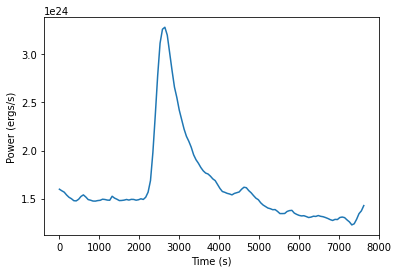

In [ ]:
import matplotlib.pyplot as plt

plt.plot(solar_stoker['time (seconds)'], solar_stoker['longwave (ergs/s)'])
plt.ylabel('Power (ergs/s)')
plt.xlabel('Time (s)')

plt.show()

## Basline correction

As you learned in [Week 7 lecture](https://www.youtube.com/watch?v=XlbRg3e4T9g&feature=youtu.be), one of the primary challenges in determining the total energy of the flare is dealing with the "background." The sun is giving off x-rays even before a flare happens, and we do not want to accidentally include the energy of those x-rays as part of the flare energy. As a result, we need to determine the amount of x-ray power being emitted before the flare (the "baseline") and subtract it from the observed power during the flare to make sure we are only determining the *new* energy created by the flare itself.

Make sure your team has a clear plan for this; refer back to the Week 7 pre-lab lecture, the examples of baseline corrections on the Week 7 Canvas page, or  ask your TA if you need help! 

Hint:
You will want to plot the data from the time period leading up to the flare in order to "see" it clearly and to decide on a strategy. For this part, we don't have to care yet about having time in seconds. In fact, it might be easier to leave time in arbitraty "index" units (i.e., data point 1, data point 2, data point 3, and so on). That way, it will be easy to discuss which data points you want to focus on. For example, maybe you think the pre-flare background is points 4 through 50. Then you can easily access these data points like this:

`solar_data.iloc[4:50,1]`


[*Use this markdown cell to explain how you are doing the baseline correction and the reasoning behind the method you chose. Be as detailed as possible!*]

In this code cell, we're plotting the flare data with arbitrary time units and zooming in on the data before the flare starts to pick the start time for the integration part. 



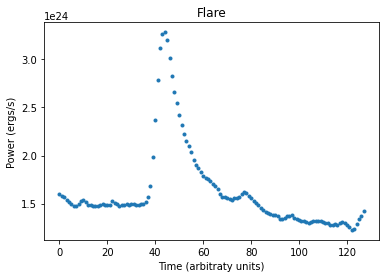

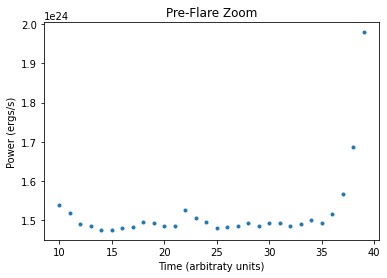

In [ ]:
# You may need the statistics library for determining means and medians
import statistics as stats     

# You will need to plot your flare (as shown in the examples of baseline corrections notebook)
# in order to look at the pre-flare data and show the baseline corrected flare
import matplotlib.pyplot as plt

## Write your code here
plt.plot(solar_stoker['longwave (ergs/s)'], ".") # Plot solar flare data with arbitrary units  of time
plt.title("Flare")
plt.ylabel('Power (ergs/s)')
plt.xlabel("Time (arbitraty units)")
plt.show()

plt.plot(solar_stoker.iloc[10:40,1],".")   # Zoom in on data before the flare begins
plt.title("Pre-Flare Zoom")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitraty units)")
plt.show()



In this code cell, we're determining the average baseline before the flare starts and plotting a line to show the position of baseline on the flare. 

We're also zooming in on the data at the end of the flare to pick the end time for the integration part.

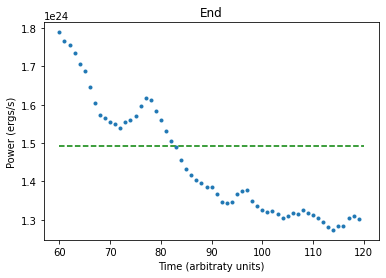

In [ ]:
avg_tailend = solar_stoker.iloc[20:35,1].mean() #Determine average baseline
x_coordinates = [60, 120]
y_coordinates = [avg_baseline, avg_baseline]
plt.plot(x_coordinates, y_coordinates, 'g--') #Plot baseline

plt.plot(solar_stoker.iloc[60:120,1],".")   # Zoom in on the data before flare end
plt.title("End")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitraty units)")
plt.show()

In this code cell, we're calculating the local minima of the bump at the tail end of the flare, and plotting it with the average baseline previously calculated.

array([[1.53923468e+24]])

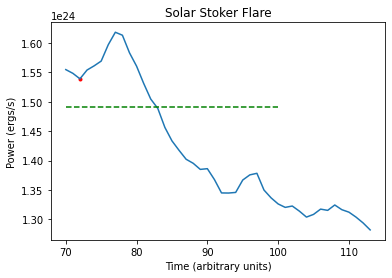

The average for the baseline is 1.491330788361092e+24


In [ ]:
import numpy as np
from scipy.signal import argrelextrema   # Import the argrelextrema function
# Finding the local Minima at the tail end of the flare to reduce erroneous data 
# Need to convert the data from a dataframe to an numpy array
a = pd.DataFrame.to_numpy(solar_stoker.iloc[70:80,1])

# Use the argrelextrema function to find the locations (index) of the local minima
min_locs = np.asarray(argrelextrema(a, np.less))  

plt.plot(72, a[min_locs], 'r.') # Plot mimina as red dots
plt.title("Solar Stoker Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")

display(a[min_locs])
plt.plot(solar_stoker.iloc[70:114,1]) # Plot pre-flare data


avg_tailend = solar_stoker.iloc[20:35,1].mean() #Determine average baseline
x_coordinates = [70, 100]
y_coordinates = [avg_baseline, avg_baseline]
plt.plot(x_coordinates, y_coordinates, 'g--') #Plot baseline
plt.show()
print('The average for the baseline is' , avg_baseline)

We found an equation of a line that connects the minimum point of the bump at the tail of the flare to the end point of the flare, and created a variable "y" that represents the equation.

In [ ]:
m = -4.79039e+21
b = 1.88414276e+24
x = np.array(range(72,82))
y = m*x + b


## Reporting total energy

Once you have determined the baseline and subtracted this "background," you are ready to determine the total flare energy. Last week, we did this for a practice flare using a function we called `integrate.trapz`. Use this same function to compute the total energy of your new flare, referring back to your work last week if you need to.

Note: As several of our teams learned last week, this function is a little tricky! Make sure to use the appropiate limits for integration by indexing the `x` and `y` variables. You also have to tell it both the y-data AND the x-data to get the integration right (by default, it integrates assuming the x-coordinates are 1, 2, 3, 4, etc.) Be careful with that this week!


[*Use this markdown cell to describe how you are computing the total energy produced by the flare.*] 

We computed the total energy of the flare by integrating under the curve. This wasn’t simple however because there was another small flare overlapping on the tail end of our flare of interest. The solution to this was fitting a line from the local minimum to where the curve came back to the baseline and integrating the line for those time values and adding it to the integral of the peak before that.

In [ ]:
import scipy.integrate as integrate

solar_stoker_blremov = solar_stoker['longwave (ergs/s)'].subtract(avg_baseline) # redefine solar flare data with the baseline correction

A1 = integrate.trapz(solar_stoker_blremov[35:72], solar_stoker.iloc[35:72,0]) #integrate flare from start time until before the bump at the tail of the falre

A2 = integrate.trapz(y, solar_stoker.iloc[72:82,0])

print('\n Total Energy of The Solar Stoker is: ', A1 + A2, ' ergs') #print result



 Total Energy of The Solar Stoker is:  2.1883730533553072e+27  ergs




Note! As you may know, every measurement in experimental physics is subject to some  ***uncertainty***. The flare energy is no different-- we don't have time to figure out the uncertainty this week, but we will definitely need to do that before reporting out final results.

# **Task 5: Comment, save, and submit**

* Comment your code.

* Double-check all your code cells have been executed. 

* Save this file as a PDF, click Print. In the printer dialog box select "Save as PDF" as your destination and click "Save".  

* Double-check that you can see all of the executed code cells, tables, and graphs in the PDF. **IF YOU ARE HAVING TROUBLE PRINTING TO A PDF, PLEASE RUN THE CODE CELL AT THE END OF THE COLAB NOTEBOOK.**

* In this Goolge Colab notebook, click on "Share" in the upper right-hand corner of the window. 

<img src=https://i.pinimg.com/originals/8f/c5/ee/8fc5ee91627c0353febe142ff9adde82.png
 width="250">   

* Under "Get Link" click on "Change". Change the "Share" settings so that anyone with the link and be a commenter. 

 <img src=https://i.pinimg.com/originals/83/d5/a0/83d5a060a21b96208814e85a6761693a.png
 width="500">

 <img src=https://i.pinimg.com/originals/66/5e/94/665e943a4a0ee20a965f6c89b86f6e47.png
 width="300">

* In Canvas, upload the PDF file as an assignment and copy and paste the link to this notebook as the comment.


## Need help converting your colab notebook to a PDF?

The following code cell will covert your colab notebook to a PDF. 

>(1) You will need to first **change the filename** to the name the colab notebook you would like to convert. For example, your colab file for Week 8 and 9 is likely to be called `'Week8and9_DetermingTotalEnergyofFlare.ipynb'`. 

> (2) You will need to mount your google drive. If your drive is not mounted already, the code cell will prompt you with the steps to do this as it runs.

> (3) The PDF will be saved to the same folder as this code cell. You can then download the PDF from google drive and upload it onto Canvas.

> (4) If you run into an error saying that the "list index is out of range" try two fixes:
>> - First, make sure your filename is correct
>> - Move your Colab notebook into the main area of the drive instead of having it in a folder.

In [ ]:
################################################################################
#                    CODE TO CONVERT COLAB NOTEBOOK TO PDF                     #
#This code converts an .ipynb file to a Tex based PDF and saves it in the Colab#
#Notebook folder with the same filename.pdf                                    #
################################################################################

# Please change the file name to the name of your colab notebook
filename = 'Week8and9_DetermingTotalEnergyofFlare.ipynb' # Ex. 'Coding_Packet.ipynb'

from google.colab import drive
drive.mount('/content/gdrive', force_remount = True) # This is done first-
#- because we need a temporal delay between mounting and calling
#Install some dependences into the RUNTIME (is not local, needs to reinstall-
#- every runtime)
!echo 'Installing pips. This may take a few minutes.'
!pip install IPython >> outputsuppressed.txt
!pip install Latex >> outputsuppressed.txt
!pip install pandoc >> outputsuppressed.txt
!pip install nbconvert >> outputsuppressed.txt
!pip install jupyter >> outputsuppressed.txt

#Well known Ubuntu Tex library
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> outputsuppressed.txt

# Searches the Google drive directory for the filename and gives back it's location
#(This accounts for Wildcards and Spaces in the directory names)
#Uses jupyter and nbconvert to convert the ipynb file to a Tex file, then into a
#pdf

!IFS=$'\n' #Sets the reader to only break at newlines instead of spaces,tabs,and newlines
!echo 'Finding file. This may take a minute or two depending on the size of your drive'
loc= !find '/content/gdrive' -name "{filename}"
fileloc = loc[0]
!jupyter nbconvert --to pdf "{fileloc}"

from datetime import datetime
import random 
now = datetime.now()
print('\n', now.strftime("%d/%m/%Y %H:%M:%S"), random.randrange(1000000, 9999999, 1))

# The PDF will be in the same folder as the original file
!echo "";echo "Conversion Complete. The pdf will be in the same location as your .ipynb file";echo "";echo "Have a Nice Day!"

############ Version:
# Created by Thomas Horning
# Last Update: 2020-09-25, 12:49 pm - Thomas Horning
#  - Moved Dev Notes to Markdown Cell
#  - Created Version Log
#  - Added completion response 

##

Mounted at /content/gdrive
Installing pips. This may take a few minutes.
Finding file. This may take a minute or two depending on the size of your drive
[NbConvertApp] Converting notebook /content/gdrive/My Drive/Colab Notebooks/Week8and9_DetermingTotalEnergyofFlare.ipynb to pdf
[NbConvertApp] Support files will be in Week8and9_DetermingTotalEnergyofFlare_files/
[NbConvertApp] Making directory ./Week8and9_DetermingTotalEnergyofFlare_files
[NbConvertApp] Making directory ./Week8and9_DetermingTotalEnergyofFlare_files
[NbConvertApp] Making directory ./Week8and9_DetermingTotalEnergyofFlare_files
[NbConvertApp] Making directory ./Week8and9_DetermingTotalEnergyofFlare_files
[NbConvertApp] Making directory ./Week8and9_DetermingTotalEnergyofFlare_files
[NbConvertApp] Making directory ./Week8and9_DetermingTotalEnergyofFlare_files
[NbConvertApp] Writing 56559 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbC

## **Task 6*: Find more flares!**

If time allows, choose another flare from C through X class! Follow the same procedure from above to report the total energy of the flare.

As before, make sure to provide a detailed description of the flares, which includes the date and time (in UCT) of the peak of the flare, as well as the subclass (e.g., C5.3) and other descriptive information. 